In [1]:
import pandas as pd

In [17]:
df = pd.read_csv("USA_merged_works.csv")
df

,Unnamed: 0,Day of Sighting,State,City,Summary,Date,code,Direction,Time,Authority Advised,...,elevation_ft,continent,iso_country,iso_region,municipality,icao_code,iata_code,gps_code,local_code,coordinates
0,0,4/1/2022,PENNSYLVANIA,PITTSBURGH,"PRELIM INFO FROM FAA OPS: PITTSBURGH, PA/UAS I...",NaN,AGC,S BOUND,2358E,ALLEGHENY COUNTY ATCT,...,1252.0,NaN,US,US-PA,Pittsburgh,KAGC,AGC,KAGC,AGC,"40.354401, -79.930199"
1,1,4/1/2022,FLORIDA,MIAMI,"PRELIM INFO FROM FAA OPS: MIAMI, FL/UAS INCIDE...",NaN,OPF,W BOUND,1205E,NaN,...,8.0,NaN,US,US-FL,Miami,KOPF,OPF,KOPF,OPF,"25.907, -80.278397"
2,2,4/1/2022,WASHINGTON,SEATTLE,"PRELIM INFO FROM FAA OPS: SEATTLE, WA/UAS INCI...",NaN,BFI,NNE BOUND,1210P,SEATTLE TRACON,...,21.0,NaN,US,US-WA,Seattle,KBFI,BFI,KBFI,BFI,"47.529999, -122.302002"
3,3,4/1/2022,ALABAMA,MOBILE,"PRELIM INFO FROM FAA OPS: MOBILE, AL/UAS INCID...",NaN,BFM,SE BOUND,1859C,MOBILE APCH,...,26.0,NaN,US,US-AL,Mobile,KBFM,BFM,KBFM,BFM,"30.626800537100003, -88.06809997559999"
4,4,4/1/2022,WASHINGTON,SEATTLE,"PRELIM INFO FROM FAA OPS: SEATTLE, WA/UAS INCI...",NaN,SEA,W BOUND,1805P,SEATTLE TRACON,...,433.0,NaN,US,US-WA,Seattle,KSEA,SEA,KSEA,SEA,"47.447943, -122.310276"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7362,7577,NaN,FLORIDA,WEST PALM BEACH,"PRELIM INFO FROM FAA OPS: WEST PALM BEACH, FL/...",NaN,DFW,E BOUND,1800E,PALM BEACH TRACON,...,607.0,NaN,US,US-TX,Dallas-Fort Worth,KDFW,DFW,KDFW,DFW,"32.896801, -97.038002"
7363,7578,NaN,FLORIDA,FORT MYERS,"PRELIM INFO FROM FAA OPS: FORT MYERS, FL/UAS I...",NaN,APF,S BOUND,1655E,FORT MYERS APCH,...,8.0,NaN,US,US-FL,Naples,KAPF,APF,KAPF,APF,"26.1525993347, -81.7752990723"
7364,7579,NaN,FLORIDA,NAPLES,_x000D_\nSummary: A/C WAS SOUTHBOUND TO APF AT...,NaN,APF,NaN,NaN,NaN,...,8.0,NaN,US,US-FL,Naples,KAPF,APF,KAPF,APF,"26.1525993347, -81.7752990723"
7365,7580,NaN,HAWAII,HONOLULU,"PRELIM INFO FROM FAA OPS: HONOLULU, HI/UAS INC...",NaN,HNL,NaN,1512L,NaN,...,13.0,NaN,US,US-HI,"Honolulu, Oahu",PHNL,HNL,PHNL,HNL,"21.32062, -157.924228"


In [18]:
# Get counts of sightings by IATA code
top_airports = (
    df.groupby('iata_code')
    .size()
    .reset_index(name='uas_sighting_count')
    .sort_values(by='uas_sighting_count', ascending=False)
)

# Get one row per iata_code with name (e.g., municipality or ident)
airport_names = df[['iata_code', 'name']].drop_duplicates()

# Merge names into top_airports
top_airports_named = top_airports.merge(airport_names, on='iata_code', how='left')

# Show top 10 with names
top_airports_named.head(10)


,iata_code,uas_sighting_count,name
0,AND,431,Anderson Regional Airport
1,SAN,284,San Diego International Airport
2,LGA,238,LaGuardia Airport
3,ORD,221,Chicago O'Hare International Airport
4,DEN,208,Denver International Airport
5,ATL,204,Hartsfield Jackson Atlanta International Airport
6,OFF,186,Offutt Air Force Base
7,DFW,176,Dallas Fort Worth International Airport
8,LAX,171,Los Angeles International Airport
9,MCO,147,Orlando International Airport


In [9]:
top_airports_named.head(10)[["name"]]

,name
0,Anderson Regional Airport
1,San Diego International Airport
2,LaGuardia Airport
3,Chicago O'Hare International Airport
4,Denver International Airport
5,Hartsfield Jackson Atlanta International Airport
6,Offutt Air Force Base
7,Dallas Fort Worth International Airport
8,Los Angeles International Airport
9,Orlando International Airport


In [14]:
ca_df.columns

Index(['Unnamed: 0', 'Day of Sighting', 'State', 'City', 'Summary', 'Date',
       'code', 'Direction', 'Time', 'Authority Advised', 'Route', 'Location',
       'Altitude', 'ident', 'type', 'name', 'elevation_ft', 'continent',
       'iso_country', 'iso_region', 'municipality', 'icao_code', 'iata_code',
       'gps_code', 'local_code', 'coordinates'],
      dtype='object')

In [13]:
# Filter to only California sightings
ca_df = df[df['iso_region'].str.upper() == 'US-CA']

# Group by IATA code and count
top_ca_airports = (
    ca_df.groupby('iata_code')
    .size()
    .reset_index(name='uas_sighting_count')
    .sort_values(by='uas_sighting_count', ascending=False)
)

# Optionally merge airport names (e.g., municipality)
airport_names = ca_df[['iata_code', 'municipality']].drop_duplicates()
top_ca_airports_named = top_ca_airports.merge(airport_names, on='iata_code', how='left')

# Show top 5
top_ca_airports_named.head(10)


,iata_code,uas_sighting_count,municipality
0,SAN,284,San Diego
1,LAX,171,Los Angeles
2,SNA,54,Santa Ana
3,VNY,37,Van Nuys
4,ONT,28,Ontario
5,SFO,27,San Francisco
6,BUR,26,Burbank
7,OAK,21,Oakland
8,SJC,15,San Jose
9,EMT,13,El Monte


In [19]:
df_2 = pd.read_csv("xyzdataframe_small.csv")
df_2

,Unnamed: 0,Day of Sighting,x,y,z,State,City,Date,code,Direction,...,iso_region,municipality,icao_code,iata_code,gps_code,local_code,coordinates,latitude,longitude,alt_meters
0,0,4/1/2022,8.510401e+05,-4.792341e+06,4.108053e+06,PENNSYLVANIA,PITTSBURGH,NaN,AGC,S BOUND,...,US-PA,Pittsburgh,KAGC,AGC,KAGC,AGC,"40.354401, -79.930199",40.354401,-79.930199,0.0
1,1,4/1/2022,9.694027e+05,-5.658393e+06,2.769798e+06,FLORIDA,MIAMI,NaN,OPF,W BOUND,...,US-FL,Miami,KOPF,OPF,KOPF,OPF,"25.907, -80.278397",25.907000,-80.278397,0.0
2,2,4/1/2022,-2.305542e+06,-3.646725e+06,4.681750e+06,WASHINGTON,SEATTLE,NaN,BFI,NNE BOUND,...,US-WA,Seattle,KBFI,BFI,KBFI,BFI,"47.529999, -122.302002",47.529999,-122.302002,0.0
3,3,4/1/2022,1.851842e+05,-5.490063e+06,3.230359e+06,ALABAMA,MOBILE,NaN,BFM,SE BOUND,...,US-AL,Mobile,KBFM,BFM,KBFM,BFM,"30.626800537100003, -88.06809997559999",30.626801,-88.068100,0.0
4,4,4/1/2022,-2.309663e+06,-3.652075e+06,4.675586e+06,WASHINGTON,SEATTLE,NaN,SEA,W BOUND,...,US-WA,Seattle,KSEA,SEA,KSEA,SEA,"47.447943, -122.310276",47.447943,-122.310276,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7577,7577,NaN,-6.568338e+05,-5.320307e+06,3.444354e+06,FLORIDA,WEST PALM BEACH,NaN,DFW,E BOUND,...,US-TX,Dallas-Fort Worth,KDFW,DFW,KDFW,DFW,"32.896801, -97.038002",32.896801,-97.038002,0.0
7578,7578,NaN,8.195501e+05,-5.669967e+06,2.794247e+06,FLORIDA,FORT MYERS,NaN,APF,S BOUND,...,US-FL,Naples,KAPF,APF,KAPF,APF,"26.1525993347, -81.7752990723",26.152599,-81.775299,0.0
7579,7579,NaN,8.195501e+05,-5.669967e+06,2.794247e+06,FLORIDA,NAPLES,NaN,APF,NaN,...,US-FL,Naples,KAPF,APF,KAPF,APF,"26.1525993347, -81.7752990723",26.152599,-81.775299,0.0
7580,7580,NaN,-5.508464e+06,-2.234042e+06,2.304500e+06,HAWAII,HONOLULU,NaN,HNL,NaN,...,US-HI,"Honolulu, Oahu",PHNL,HNL,PHNL,HNL,"21.32062, -157.924228",21.320620,-157.924228,0.0


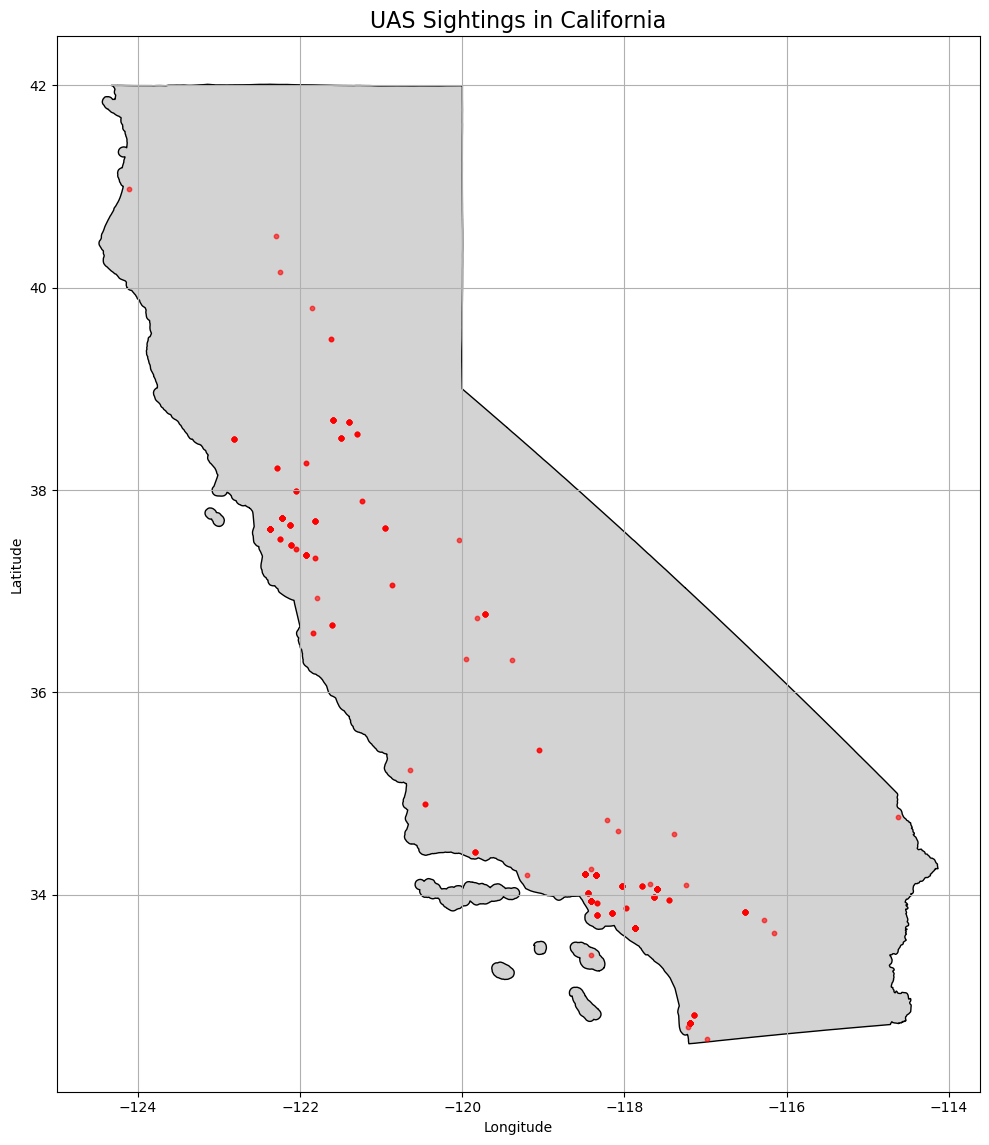

In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_2 = pd.read_csv("xyzdataframe_small.csv")
df_ca = df_2[df_2['iso_region'].str.upper() == 'US-CA'].copy()

# Convert to GeoDataFrame
gdf_points = gpd.GeoDataFrame(
    df_ca,
    geometry=gpd.points_from_xy(df_ca['longitude'], df_ca['latitude']),
    crs="EPSG:4326"
)

# Load and reproject shapefile to match point CRS
ca_shapefile = "/Users/vishalivallioor/Desktop/drone_intrusion/drone-intrusion/ca_state"
gdf_ca_shape = gpd.read_file(ca_shapefile).to_crs(epsg=4326)

# Plot
fig, ax = plt.subplots(figsize=(10, 12))
gdf_ca_shape.plot(ax=ax, color='lightgray', edgecolor='black')
gdf_points.plot(ax=ax, color='red', markersize=10, alpha=0.6)

# Labels and layout
plt.title("UAS Sightings in California", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.3 MB/s eta 0:00:00a 0:00:01


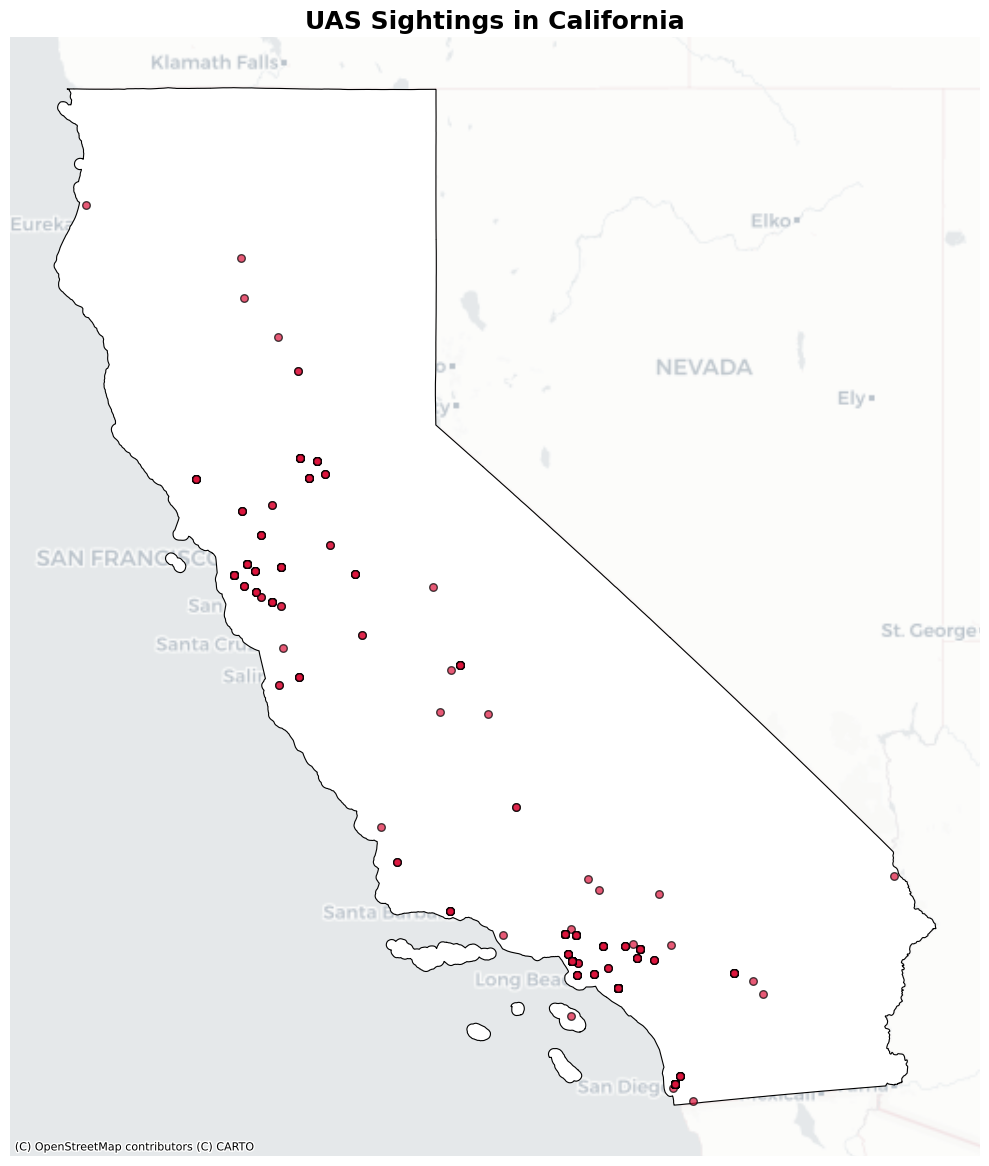

In [28]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

# Load data
df_2 = pd.read_csv("xyzdataframe_small.csv")
df_ca = df_2[df_2['iso_region'].str.upper() == 'US-CA'].copy()

# Filter invalid coords (just in case)
df_ca = df_ca[
    df_ca['latitude'].between(32.5, 42.1) &
    df_ca['longitude'].between(-124.5, -114.1)
].copy()

# Create GeoDataFrame
gdf_points = gpd.GeoDataFrame(
    df_ca,
    geometry=gpd.points_from_xy(df_ca['longitude'], df_ca['latitude']),
    crs="EPSG:4326"
)

# Load and convert CA shapefile
ca_shapefile = "/Users/vishalivallioor/Desktop/drone_intrusion/drone-intrusion/ca_state"
gdf_ca_shape = gpd.read_file(ca_shapefile).to_crs(epsg=4326)

# Reproject everything to Web Mercator (EPSG:3857) for contextily
gdf_points_web = gdf_points.to_crs(epsg=3857)
gdf_ca_shape_web = gdf_ca_shape.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(10, 12))
gdf_ca_shape_web.plot(ax=ax, color='white', edgecolor='black', linewidth=0.8)
gdf_points_web.plot(ax=ax, color='crimson', markersize=30, alpha=0.7, edgecolor='black')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.6)

# Formatting
ax.set_title("UAS Sightings in California", fontsize=18, weight='bold')
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [30]:
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 1.5 MB/s eta 0:00:00a 0:00:01


In [38]:
df_2

,Unnamed: 0,Day of Sighting,x,y,z,State,City,Date,code,Direction,...,iso_region,municipality,icao_code,iata_code,gps_code,local_code,coordinates,latitude,longitude,alt_meters
0,0,4/1/2022,8.510401e+05,-4.792341e+06,4.108053e+06,PENNSYLVANIA,PITTSBURGH,NaN,AGC,S BOUND,...,US-PA,Pittsburgh,KAGC,AGC,KAGC,AGC,"40.354401, -79.930199",40.354401,-79.930199,0.0
1,1,4/1/2022,9.694027e+05,-5.658393e+06,2.769798e+06,FLORIDA,MIAMI,NaN,OPF,W BOUND,...,US-FL,Miami,KOPF,OPF,KOPF,OPF,"25.907, -80.278397",25.907000,-80.278397,0.0
2,2,4/1/2022,-2.305542e+06,-3.646725e+06,4.681750e+06,WASHINGTON,SEATTLE,NaN,BFI,NNE BOUND,...,US-WA,Seattle,KBFI,BFI,KBFI,BFI,"47.529999, -122.302002",47.529999,-122.302002,0.0
3,3,4/1/2022,1.851842e+05,-5.490063e+06,3.230359e+06,ALABAMA,MOBILE,NaN,BFM,SE BOUND,...,US-AL,Mobile,KBFM,BFM,KBFM,BFM,"30.626800537100003, -88.06809997559999",30.626801,-88.068100,0.0
4,4,4/1/2022,-2.309663e+06,-3.652075e+06,4.675586e+06,WASHINGTON,SEATTLE,NaN,SEA,W BOUND,...,US-WA,Seattle,KSEA,SEA,KSEA,SEA,"47.447943, -122.310276",47.447943,-122.310276,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7577,7577,NaN,-6.568338e+05,-5.320307e+06,3.444354e+06,FLORIDA,WEST PALM BEACH,NaN,DFW,E BOUND,...,US-TX,Dallas-Fort Worth,KDFW,DFW,KDFW,DFW,"32.896801, -97.038002",32.896801,-97.038002,0.0
7578,7578,NaN,8.195501e+05,-5.669967e+06,2.794247e+06,FLORIDA,FORT MYERS,NaN,APF,S BOUND,...,US-FL,Naples,KAPF,APF,KAPF,APF,"26.1525993347, -81.7752990723",26.152599,-81.775299,0.0
7579,7579,NaN,8.195501e+05,-5.669967e+06,2.794247e+06,FLORIDA,NAPLES,NaN,APF,NaN,...,US-FL,Naples,KAPF,APF,KAPF,APF,"26.1525993347, -81.7752990723",26.152599,-81.775299,0.0
7580,7580,NaN,-5.508464e+06,-2.234042e+06,2.304500e+06,HAWAII,HONOLULU,NaN,HNL,NaN,...,US-HI,"Honolulu, Oahu",PHNL,HNL,PHNL,HNL,"21.32062, -157.924228",21.320620,-157.924228,0.0


In [34]:
import folium
from folium.plugins import HeatMap

# Filter to valid CA rows again
df_heat = df_2

# Create base map centered on California
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Add heatmap layer
heat_data = df_heat[['latitude', 'longitude']].dropna().values.tolist()
HeatMap(heat_data, radius=10, blur=15, min_opacity=0.4).add_to(m)

# Show map
m


In [42]:
import folium
from folium.plugins import HeatMap

# Filter out missing values
df_heat = df_2[['latitude', 'longitude', 'z']].dropna()

# Normalize z for heat intensity
z_norm = (df_heat['z'] - df_heat['z'].min()) / (df_heat['z'].max() - df_heat['z'].min())

# Combine lat/lon/z into heatmap-friendly format
heat_data = [
    [row.latitude, row.longitude, weight]
    for row, weight in zip(df_heat.itertuples(index=False), z_norm)
]

# Create base map
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Add heatmap with intensity based on 3D Z value
HeatMap(heat_data, radius=10, blur=15, min_opacity=0.4, max_val=1.0).add_to(m)

# Display the map
m


/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_91968/2037571497.py:20: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, radius=10, blur=15, min_opacity=0.4, max_val=1.0).add_to(m)
